<a href="https://colab.research.google.com/github/FauziArifin/PacktData/blob/master/Term_Deposits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Term Deposits Plan**


---

The marketing head of the bank where you are a data scientist approaches you with a problem they would like to be addressed. The marketing team recently completed a marketing campaign where they have collated a lot of information on existing customers. They require your help to identify which of these customers are likely to buy a term deposit plan


**Binary Classification**


---
Classification problems are the most prevalent use cases you will encounter in the real world. Unlike regression problems, where a real numbered value is predicted, classification problems deal with associating an example to a category.


In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset_url = 'https://raw.githubusercontent.com/FauziArifin/PacktData/master/Dataset/term_deposit_dataset.csv'
df_bank = pd.read_csv(dataset_url, sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#print the shape of the data
print(df_bank.shape)

(45211, 17)


In [5]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df_bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [10]:
df_bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

**Exploratory Data Analysis**



In [0]:
import matplotlib.pyplot as plt
import altair as alt

In [0]:
filter_mask = df_bank['y'] == 'yes'
bankSub1 = df_bank[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [13]:
#visualize the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [14]:
#getting another perspective
ageTot = df_bank.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129
...,...,...
72,90,2
73,92,2
74,93,2
75,94,1


In [15]:
# Getting all the details in one place
ageProp = df_bank.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [16]:
#Merge both data frames
ageComb = pd.merge(ageProp, ageTot, left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [17]:
#display the proportion
chart_ageComb = alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')
chart_ageComb

alt.FacetChart(...)

In [18]:
#total counts under each job category
jobTot = df_bank.groupby('job')['y'].agg(jobTot = 'count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [21]:
#more detail
jobProp = df_bank.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()
jobProp

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [22]:
#Merge both data frames
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100

jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


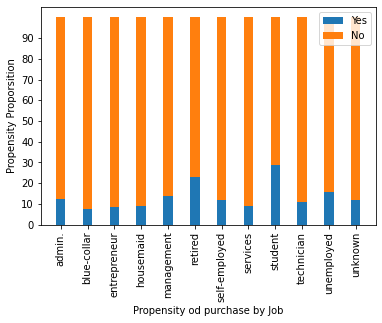

In [30]:
#Visualize with Stacked Bar
#import matplotlib
import matplotlib.pyplot as plt

#create separate for yes and no
jobCombYes = jobComb[jobComb['y'] == 'yes']
jobCombNo = jobComb[jobComb['y'] == 'no']

#length of the x_axis labels
xlabels = jobTot['job'].nunique()

#proportion value
jobYes = jobCombYes['catProp'].unique()
jobNo = jobCombNo['catProp'].unique()

#arrange the index of x axis
ind = np.arange(xlabels)

#width of each bar
width = 0.35

#plotting
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom = jobYes)

plt.ylabel('Propensity Proporsition')
plt.xlabel('Propensity od purchase by Job')

#Defining the x and y label index
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

#Defining legend
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

#to rotate the axis labels
plt.xticks(rotation=90)
plt.show()